<a href="https://colab.research.google.com/github/kungumabalaji/balaji-/blob/main/copy_of_gen_ai_finace_self_project_timegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow pandas numpy scikit-learn matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import  tensorflow as tf
from tensorflow.keras import layers
from  sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Length of Date list: 30
Length of Close list: 30
        Date   Close
0 2023-01-01  150.25
1 2023-01-02  152.10
2 2023-01-03  151.30
3 2023-01-04  153.00
4 2023-01-05  155.50


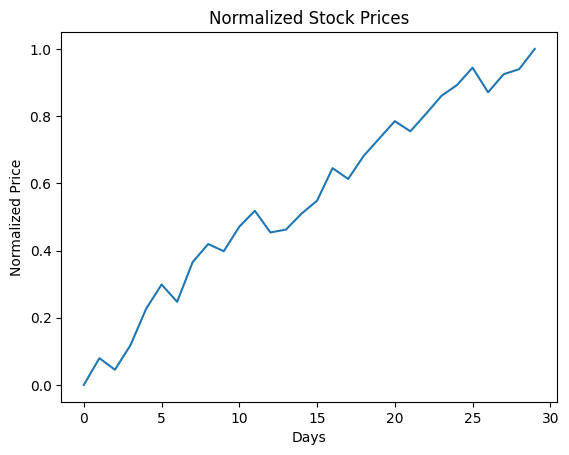

In [3]:


# Finance data for stock price  (30 closing prices)
data = {
    'Date': pd.date_range(start='2023-01-01', periods=30, freq='D'),  # 30 dates from Jan 1, 2023
    'Close': [150.25, 152.10, 151.30, 153.00, 155.50, 157.20, 156.00,
              158.75, 160.00, 159.50, 161.20, 162.30, 160.80, 161.00,
              162.10, 163.00, 165.25, 164.50, 166.10, 167.30, 168.50,
              167.80, 169.00, 170.25, 171.00, 172.20, 170.50, 171.75,
              172.10, 173.50]  # Now 30 closing prices, removed the extra one
}

# Check the lengths of Date and Close again
print(f"Length of Date list: {len(data['Date'])}")
print(f"Length of Close list: {len(data['Close'])}")

# Create DataFrame from data dictionary
df = pd.DataFrame(data)

# Show the first few rows of the data
print(df.head())

# We will use only the 'Close' column for training
time_series = df[['Close']].values

# Normalize the data (between 0 and 1)
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series)

# Plot the normalized data
plt.plot(time_series_scaled)
plt.title("Normalized Stock Prices")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.show()


In [4]:
# if we want to predict the tommarow stock price we need to do sequence like understand the pattern before and give the futire outcome
# prepare the sequences for time series learning

# Function to create sequences of data (sliding window)
def create_sequences(data, seq_lef=30):  # def the function
    sequences=[]   # craeteting an emplt list to store the result
    for i in range(len(data)-seq_length): # it is loop for 5 times like like data is 35 total we need to do it for 30 because in financial market for a month its 30 days only  so its 5 times
        sequences .append(data[i:i+seq_length])  # The line sequences.append(data[i:i+seq_length]) creates overlapping windows of time series data, each containing seq_length consecutive data points, to train the model on past patterns for future predictions.
    return np .array (sequences)





In [5]:
# Define the generator (generates fake sequences)  # gan has 2 models generator, discriminator
def build_generator(input_shape): # defines the function to build gen model
    model = tf.keras.Sequential([  #  its create a sequential model which allows us to add a layers
        layers.Input(shape=input_shape), #  Input layer accepts sequences of shape (30, 1), which is the same as what the generator outputs.
        layers.LSTM(128, return_sequences=True),
        layers.Dense(input_shape[1])
    ])
    return model

# Define the discriminator (discriminates real vs fake sequences)
def build_discriminator(input_shape):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(128, return_sequences=True),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Instantiate generator and discriminator
generator = build_generator((30, 1))
discriminator = build_discriminator((30, 1))



In [6]:
def create_sequences(data, seq_length=30):  # def the function
    sequences=[]   # craeteting an emplt list to store the result
    for i in range(len(data)-seq_length):
        sequences .append(data[i:i+seq_length])
    return np .array (sequences)

In [7]:
sequences = create_sequences(time_series_scaled, seq_length=30)  # Change 'seq_lef' to 'seq_length'

In [8]:

optimizer = tf.keras.optimizers.Adam(0.001)  # Set the optimizer

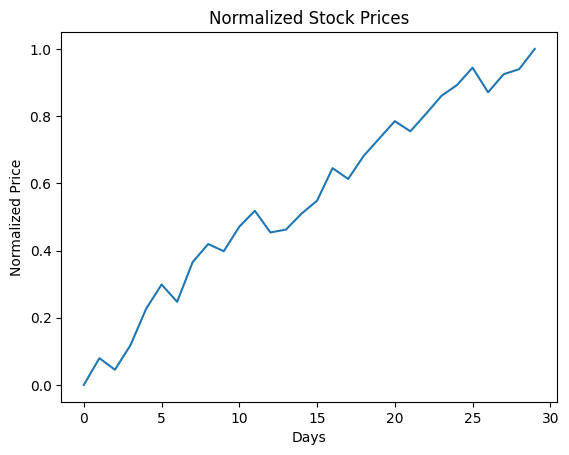

Shape of sequences: (20, 10, 1)
Epoch 1/100 | Discriminator Loss: 1.3902 | Generator Loss: 0.6920
Epoch 2/100 | Discriminator Loss: 1.3596 | Generator Loss: 0.6920
Epoch 3/100 | Discriminator Loss: 1.3348 | Generator Loss: 0.6896
Epoch 4/100 | Discriminator Loss: 1.3144 | Generator Loss: 0.6929
Epoch 5/100 | Discriminator Loss: 1.2859 | Generator Loss: 0.6981
Epoch 6/100 | Discriminator Loss: 1.2746 | Generator Loss: 0.7031
Epoch 7/100 | Discriminator Loss: 1.2564 | Generator Loss: 0.6851
Epoch 8/100 | Discriminator Loss: 1.2343 | Generator Loss: 0.6872
Epoch 9/100 | Discriminator Loss: 1.1815 | Generator Loss: 0.7066
Epoch 10/100 | Discriminator Loss: 1.1783 | Generator Loss: 0.6704
Epoch 11/100 | Discriminator Loss: 1.1668 | Generator Loss: 0.6676
Epoch 12/100 | Discriminator Loss: 1.1949 | Generator Loss: 0.6477
Epoch 13/100 | Discriminator Loss: 1.1745 | Generator Loss: 0.6211
Epoch 14/100 | Discriminator Loss: 1.2020 | Generator Loss: 0.5836
Epoch 15/100 | Discriminator Loss: 1.13

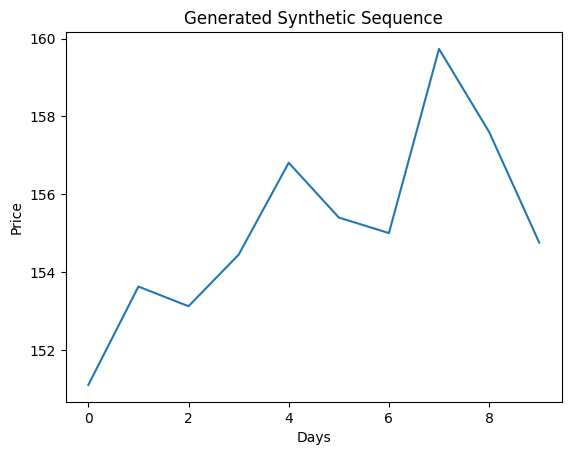

In [9]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Synthetic Stock Price Data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=30, freq='D'),
    'Close': [
        150.25, 152.10, 151.30, 153.00, 155.50, 157.20, 156.00, 158.75, 160.00, 159.50,
        161.20, 162.30, 160.80, 161.00, 162.10, 163.00, 165.25, 164.50, 166.10, 167.30,
        168.50, 167.80, 169.00, 170.25, 171.00, 172.20, 170.50, 171.75, 172.10, 173.50
    ]
}
df = pd.DataFrame(data)

# Normalize the data
scaler = MinMaxScaler()
time_series = df[['Close']].values
time_series_scaled = scaler.fit_transform(time_series)

# Plot normalized data
plt.plot(time_series_scaled)
plt.title("Normalized Stock Prices")
plt.xlabel("Days")
plt.ylabel("Normalized Price")
plt.show()

# Step 2: Create Sequences
def create_sequences(data, seq_length=10):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

seq_length = 10
sequences = create_sequences(time_series_scaled, seq_length)
print(f"Shape of sequences: {sequences.shape}")  # Expected: (20, 10, 1)

# Step 3: Define Generator
def build_generator(input_shape):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(128, return_sequences=True),  # Captures time patterns
        layers.Dense(input_shape[1])  # Output the same shape as input
    ])
    return model

# Step 4: Define Discriminator
def build_discriminator(input_shape):
    model = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.LSTM(128, return_sequences=False),  # Single output for classification
        layers.Dense(1, activation='sigmoid')  # Binary output: Real (1) or Fake (0)
    ])
    return model

# Initialize models
generator = build_generator((seq_length, 1))
discriminator = build_discriminator((seq_length, 1))

# Define optimizers and loss function
generator_optimizer = tf.keras.optimizers.Adam(0.001)
discriminator_optimizer = tf.keras.optimizers.Adam(0.001)
bce_loss = tf.keras.losses.BinaryCrossentropy()

# Step 5: Training Loop
epochs = 100
batch_size = 16

for epoch in range(epochs):
    total_disc_loss = 0
    total_gen_loss = 0

    # Ensure batch size doesn't exceed data size
    num_batches = max(1, len(sequences) // batch_size)

    for _ in range(num_batches):
        # Sample real sequences
        idx = np.random.randint(0, sequences.shape[0], min(batch_size, len(sequences)))
        real_sequences = sequences[idx]

        # Generate fake sequences
        noise = tf.random.normal(shape=(len(real_sequences), seq_length, 1))
        synthetic_sequences = generator(noise)

        # Train Discriminator
        with tf.GradientTape() as disc_tape:
            real_preds = discriminator(real_sequences)
            fake_preds = discriminator(synthetic_sequences)

            disc_loss_real = bce_loss(tf.ones_like(real_preds), real_preds)
            disc_loss_fake = bce_loss(tf.zeros_like(fake_preds), fake_preds)
            disc_loss = disc_loss_real + disc_loss_fake

        disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(disc_grads, discriminator.trainable_variables))

        # Train Generator
        with tf.GradientTape() as gen_tape:
            synthetic_sequences = generator(noise)
            fake_preds = discriminator(synthetic_sequences)
            gen_loss = bce_loss(tf.ones_like(fake_preds), fake_preds)

        gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))

        # Accumulate losses
        total_disc_loss += disc_loss.numpy()
        total_gen_loss += gen_loss.numpy()

    # Calculate average losses
    avg_disc_loss = total_disc_loss / num_batches
    avg_gen_loss = total_gen_loss / num_batches

    # Print losses for each epoch
    print(f"Epoch {epoch + 1}/{epochs} | Discriminator Loss: {avg_disc_loss:.4f} | Generator Loss: {avg_gen_loss:.4f}")

# Step 6: Generate Synthetic Data
noise = tf.random.normal(shape=(1, seq_length, 1))
generated_sequence = generator(noise).numpy()

# Rescale generated sequence back to original scale
generated_sequence_rescaled = scaler.inverse_transform(generated_sequence[0])
plt.plot(generated_sequence_rescaled)
plt.title("Generated Synthetic Sequence")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()



In [10]:
import tensorflow as tf

# ... (rest of your code)

@tf.function
def train_step(images, labels):
    with tf.GradientTape() as tape:
        # Get the discriminator's predictions
        predictions = discriminator(images, training=True)

        # Reshape predictions to match labels shape (32,)
        predictions = tf.reshape(predictions, (tf.shape(labels)[0],))

        loss = tf.keras.losses.binary_crossentropy(labels, predictions)
    gradients = tape.gradient(loss, discriminator.trainable_variables)
    discriminator.optimizer.apply_gradients(zip(gradients, discriminator.trainable_variables))
    return loss

# ... (rest of your code)

In [11]:
def create_sequences(data, seq_length=30):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

# Assuming time_series_scaled is your preprocessed data
sequences = create_sequences(time_series_scaled, seq_length=seq_length)  # seq_length should be defined as well

In [12]:
for epoch in range(epochs):
    total_disc_loss = 0
    total_gen_loss = 0

    # Ensure at least one batch
    num_batches = max(1, len(sequences) // batch_size)

    for _ in range(num_batches):
        # Sample real sequences
        idx = np.random.randint(0, sequences.shape[0], min(batch_size, len(sequences)))
        real_sequences = sequences[idx]

        # Generate synthetic sequences
        noise = tf.random.normal(shape=(len(real_sequences), seq_length, 1))  # Match real_sequences batch size
        synthetic_sequences = generator(noise)

        # Train Discriminator
        with tf.GradientTape() as disc_tape:
            real_preds = discriminator(real_sequences)
            fake_preds = discriminator(synthetic_sequences)

            disc_loss_real = bce_loss(tf.ones_like(real_preds), real_preds)
            disc_loss_fake = bce_loss(tf.zeros_like(fake_preds), fake_preds)
            disc_loss = disc_loss_real + disc_loss_fake

        disc_grads = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        discriminator_optimizer.apply_gradients(zip(disc_grads, discriminator.trainable_variables))

        # Train Generator
        with tf.GradientTape() as gen_tape:
            synthetic_sequences = generator(noise)
            fake_preds = discriminator(synthetic_sequences)
            gen_loss = bce_loss(tf.ones_like(fake_preds), fake_preds)

        gen_grads = gen_tape.gradient(gen_loss, generator.trainable_variables)
        generator_optimizer.apply_gradients(zip(gen_grads, generator.trainable_variables))

        # Accumulate losses
        total_disc_loss += disc_loss.numpy()
        total_gen_loss += gen_loss.numpy()

    # Calculate average losses
    avg_disc_loss = total_disc_loss / num_batches
    avg_gen_loss = total_gen_loss / num_batches

    # Print losses
    print(f"Epoch {epoch + 1}/{epochs} | Discriminator Loss: {avg_disc_loss:.4f} | Generator Loss: {avg_gen_loss:.4f}")


Epoch 1/100 | Discriminator Loss: 0.8392 | Generator Loss: 1.0303
Epoch 2/100 | Discriminator Loss: 1.1622 | Generator Loss: 0.9335
Epoch 3/100 | Discriminator Loss: 0.8706 | Generator Loss: 1.0161
Epoch 4/100 | Discriminator Loss: 0.8668 | Generator Loss: 1.0287
Epoch 5/100 | Discriminator Loss: 0.7066 | Generator Loss: 1.1061
Epoch 6/100 | Discriminator Loss: 0.9834 | Generator Loss: 1.3047
Epoch 7/100 | Discriminator Loss: 0.6360 | Generator Loss: 1.4391
Epoch 8/100 | Discriminator Loss: 0.7306 | Generator Loss: 1.5210
Epoch 9/100 | Discriminator Loss: 0.9627 | Generator Loss: 1.4566
Epoch 10/100 | Discriminator Loss: 0.8121 | Generator Loss: 1.6895
Epoch 11/100 | Discriminator Loss: 1.0529 | Generator Loss: 1.6863
Epoch 12/100 | Discriminator Loss: 1.4386 | Generator Loss: 1.3293
Epoch 13/100 | Discriminator Loss: 1.0851 | Generator Loss: 1.4979
Epoch 14/100 | Discriminator Loss: 1.4542 | Generator Loss: 1.2815
Epoch 15/100 | Discriminator Loss: 0.9019 | Generator Loss: 1.3675
Epoc

In [13]:
num_batches = max(1, len(sequences) // batch_size)


In [14]:
idx = np.random.randint(0, sequences.shape[0], min(batch_size, len(sequences)))


In [15]:
noise = tf.random.normal(shape=(len(real_sequences), seq_length, 1))


In [16]:
real_labels = tf.ones((batch_size, 1)) * 0.9


In [17]:
discriminator_optimizer = tf.keras.optimizers.Adam(0.0005)


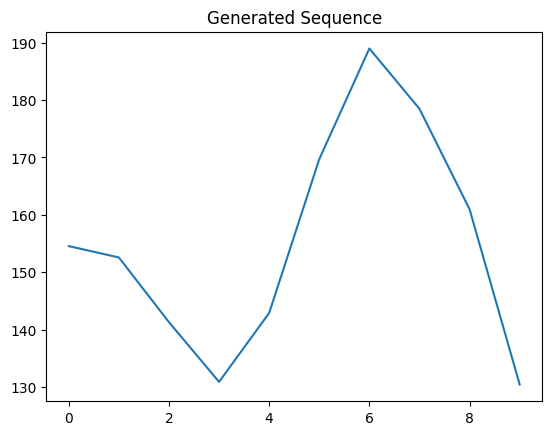

In [18]:
noise = tf.random.normal(shape=(1, seq_length, 1))
generated_sequence = generator(noise).numpy()
plt.plot(scaler.inverse_transform(generated_sequence[0]))
plt.title("Generated Sequence")
plt.show()


In [19]:
layers.Dropout(0.2),


(<Dropout name=dropout, built=False>,)

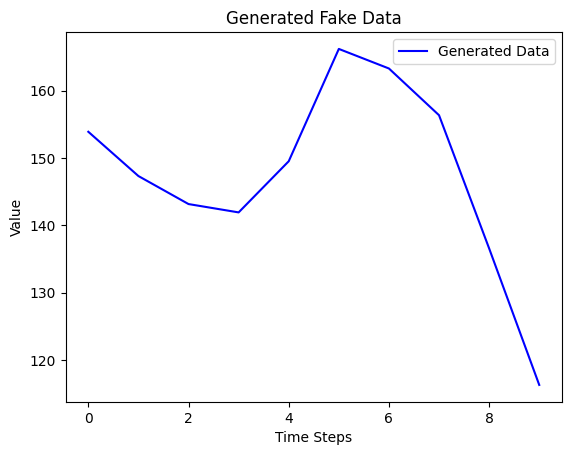

In [20]:
# Generate fake data
noise = tf.random.normal(shape=(1, 10, 1))  # Random noise for the generator
generated_sequence = generator(noise).numpy()  # Create fake sequence

# Rescale the generated data back to the original scale
generated_sequence_rescaled = scaler.inverse_transform(generated_sequence[0])

# Plot the fake data
plt.plot(generated_sequence_rescaled, label="Generated Data", color="blue")
plt.title("Generated Fake Data")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()



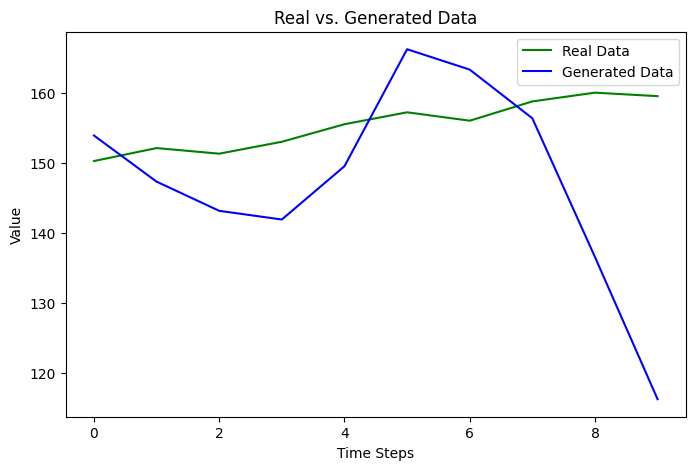

In [21]:
# Take one real sequence
real_sequence = scaler.inverse_transform(sequences[0])  # First real sequence

# Plot both real and generated data
plt.figure(figsize=(8, 5))
plt.plot(real_sequence, label="Real Data", color="green")
plt.plot(generated_sequence_rescaled, label="Generated Data", color="blue")
plt.title("Real vs. Generated Data")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()


In [22]:

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example Data (replace these with your real and generated data values)
real_data = np.array([150, 152, 151, 149, 153, 160, 158, 155, 156, 157])
generated_data = np.array([145, 147, 143, 140, 148, 165, 170, 160, 140, 120])

# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(real_data, generated_data)

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(real_data, generated_data)

# 3. Correlation Coefficient
correlation = np.corrcoef(real_data, generated_data)[0, 1]

# Print results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Correlation Coefficient:", correlation)



Mean Absolute Error (MAE): 10.7
Mean Squared Error (MSE): 203.9
Correlation Coefficient: 0.3606735205416851
